In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [2]:
data = pd.read_csv('Dados.txt',sep = '	',decimal=',')

tempos = np.array([0,2,4,6,8,10,15,20]) #Tempo corrido em minutos

comprimentos = [] # valor em nm
intensidades = [] # valor absoluto dada medida branco

for i in range(len(tempos)):
    if i ==0:
        comprimentos.append(data['Wavelength (nm)'].values)
        intensidades.append(data['Abs'].values)
    else:
        comprimentos.append(data[f'Wavelength (nm).{i}'].values)
        intensidades.append(data[f'Abs.{i}'].values)


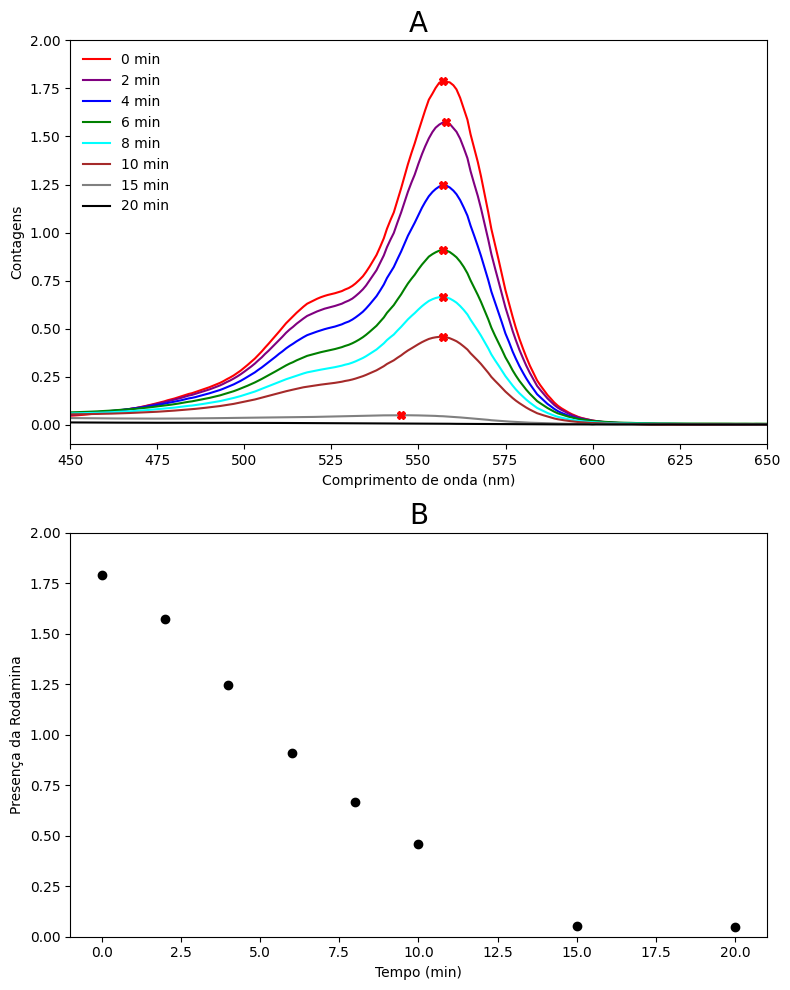

In [10]:
colors = ['red','purple','blue','green','cyan','brown' ,'gray','black']

fig,axs = plt.subplots(2,1,figsize = (8,10))



picos = []
for i in range(len(tempos)):
    peaks,_ = find_peaks(intensidades[i])
    I, p = zip(*sorted(zip(intensidades[i][peaks], comprimentos[i][peaks]), key=lambda p: (p[0], p[1])))
    picos.append(I[-1])
    axs[0].plot( comprimentos[i] , intensidades[i] , color=colors[i],label=f'{tempos[i]} min' )
    
    axs[0].plot(p[-1] , I[-1], 'X', color='red')


w0 = 450
wf = 650

axs[0].set_xlim(w0,wf)
axs[0].set_ylim(-0.1,2)
axs[0].set_ylabel('Contagens')
axs[0].set_xlabel('Comprimento de onda (nm)')
axs[0].legend(frameon=False,loc='upper left')
axs[0].set_title('A',fontsize=20)


axs[1].plot(tempos,picos , 'o' , color='black')

axs[1].set_ylim(0,2)
axs[1].set_xlabel('Tempo (min)')
axs[1].set_ylabel('Presença da Rodamina')
axs[1].set_title('B',fontsize=20)

plt.tight_layout()
plt.savefig('UV-Vis.png',dpi=300)
